In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
df.shape

(200, 5)

In [8]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [10]:
df.isnull().sum().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

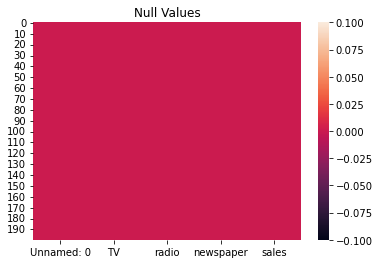

In [11]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show

In [12]:
df.nunique()

Unnamed: 0    200
TV            190
radio         167
newspaper     172
sales         121
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [14]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(200, 5)

In [17]:
df["sales"].value_counts()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: sales, Length: 121, dtype: int64

In [18]:
df.loc[df['sales']==" "]

,Unnamed: 0,TV,radio,newspaper,sales


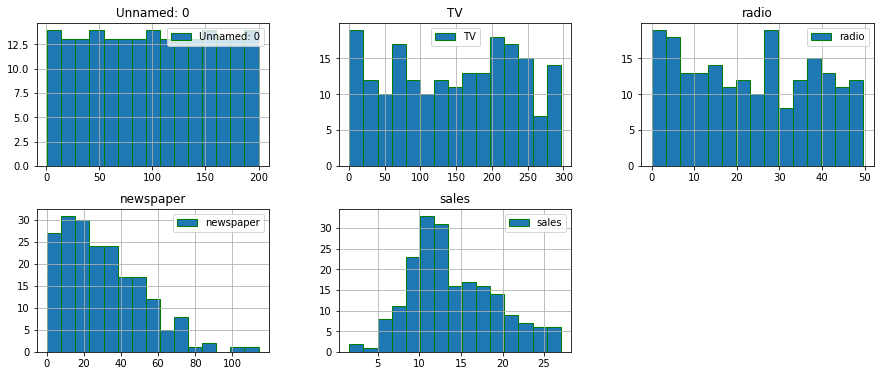

In [19]:
df.hist(figsize=(15,30),edgecolor='green',layout=(9,3),bins=15,legend=True)
plt.show()

<AxesSubplot:title={'center':'Comparision between TV and radio'}, xlabel='TV', ylabel='radio'>

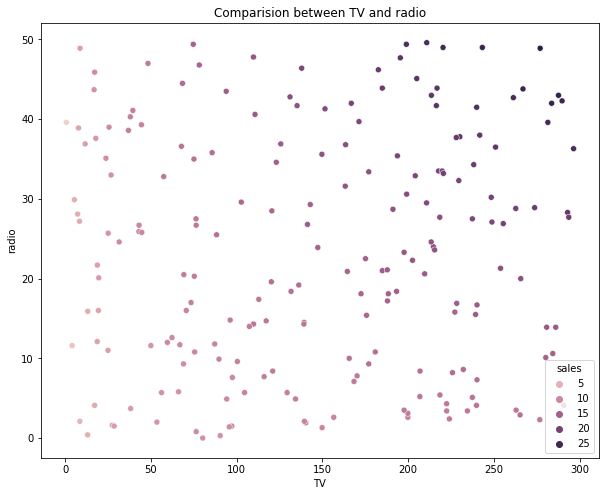

In [20]:
plt.figure(figsize=[10,8])
plt.title('Comparision between TV and radio')
sns.scatterplot(df['TV'],df['radio'],hue=df["sales"])

<AxesSubplot:title={'center':'Comparision between TV and newspaper'}, xlabel='TV', ylabel='newspaper'>

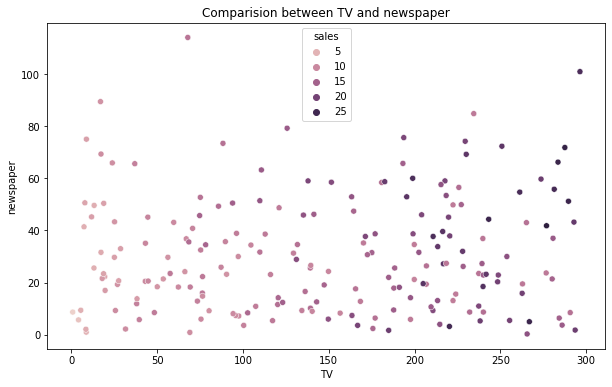

In [21]:
plt.figure(figsize=[10,6])
plt.title('Comparision between TV and newspaper')
sns.scatterplot(df['TV'],df['newspaper'],hue=df["sales"])

<AxesSubplot:title={'center':'Comparision between TV and newspaper'}, xlabel='TV', ylabel='newspaper'>

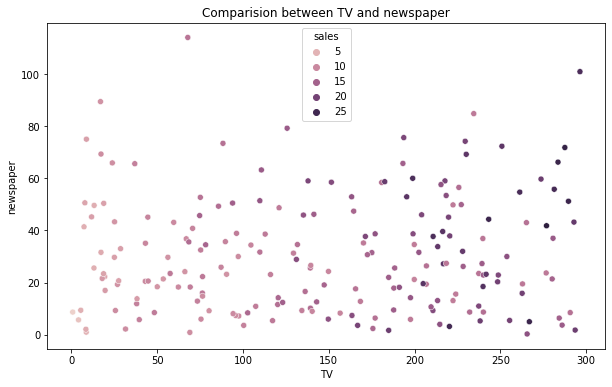

In [22]:
plt.figure(figsize=[10,6])
plt.title('Comparision between TV and newspaper')
sns.scatterplot(df['TV'],df['newspaper'],hue=df["sales"])

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

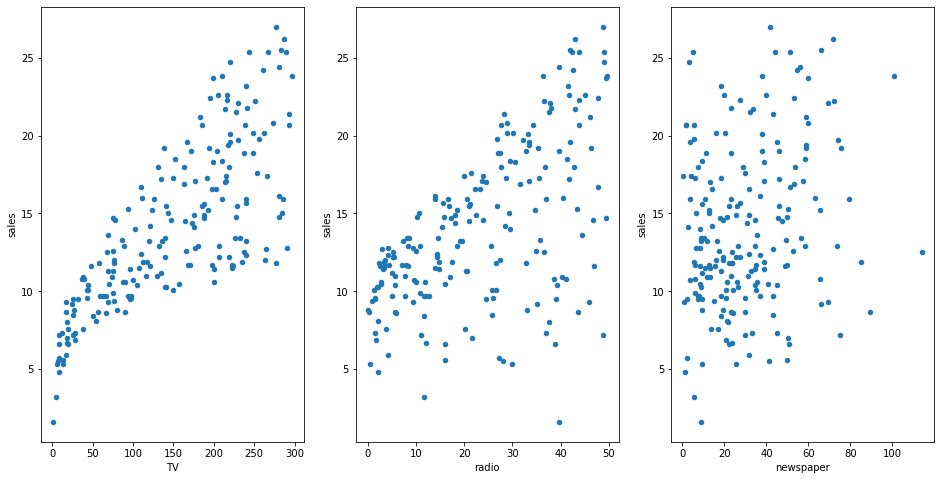

In [23]:
fig, axs = plt.subplots(1,3)
df.plot(x = "TV", y = "sales", kind = "scatter", ax=axs[0], figsize = (16,8))
df.plot(x = "radio", y = "sales", kind = "scatter", ax=axs[1])
df.plot(x = "newspaper", y = "sales", kind = "scatter", ax=axs[2])

<Figure size 1800x1800 with 0 Axes>

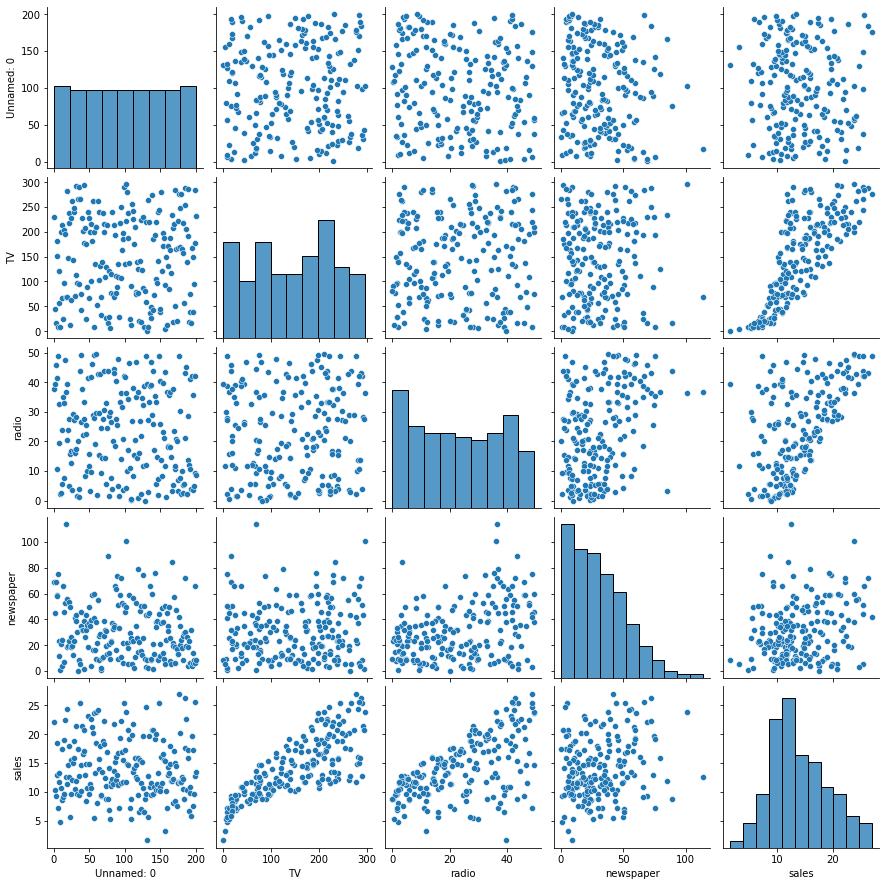

In [24]:
plt.figure(figsize=(25,25))
sns.pairplot(df)
plt.show()

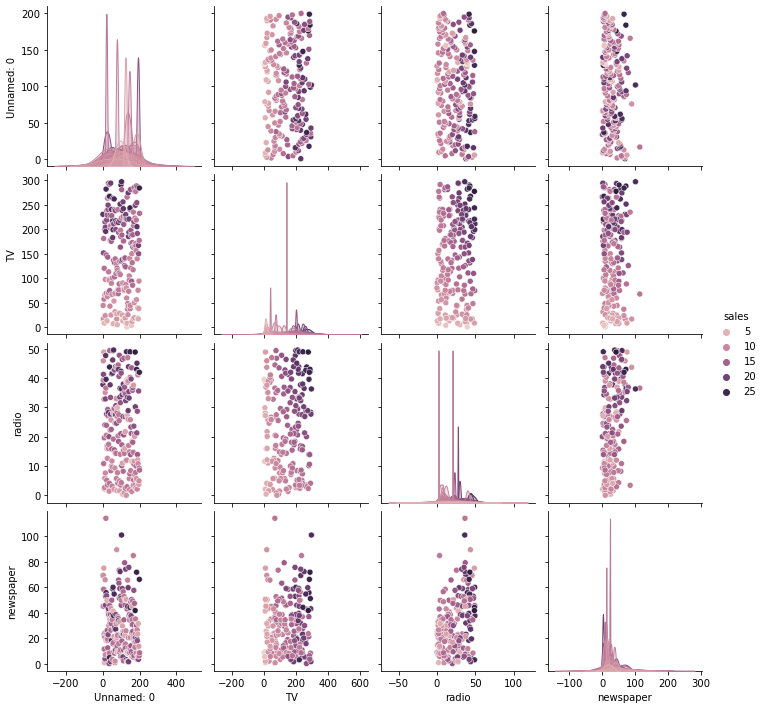

In [25]:
sns.pairplot(df,hue="sales")

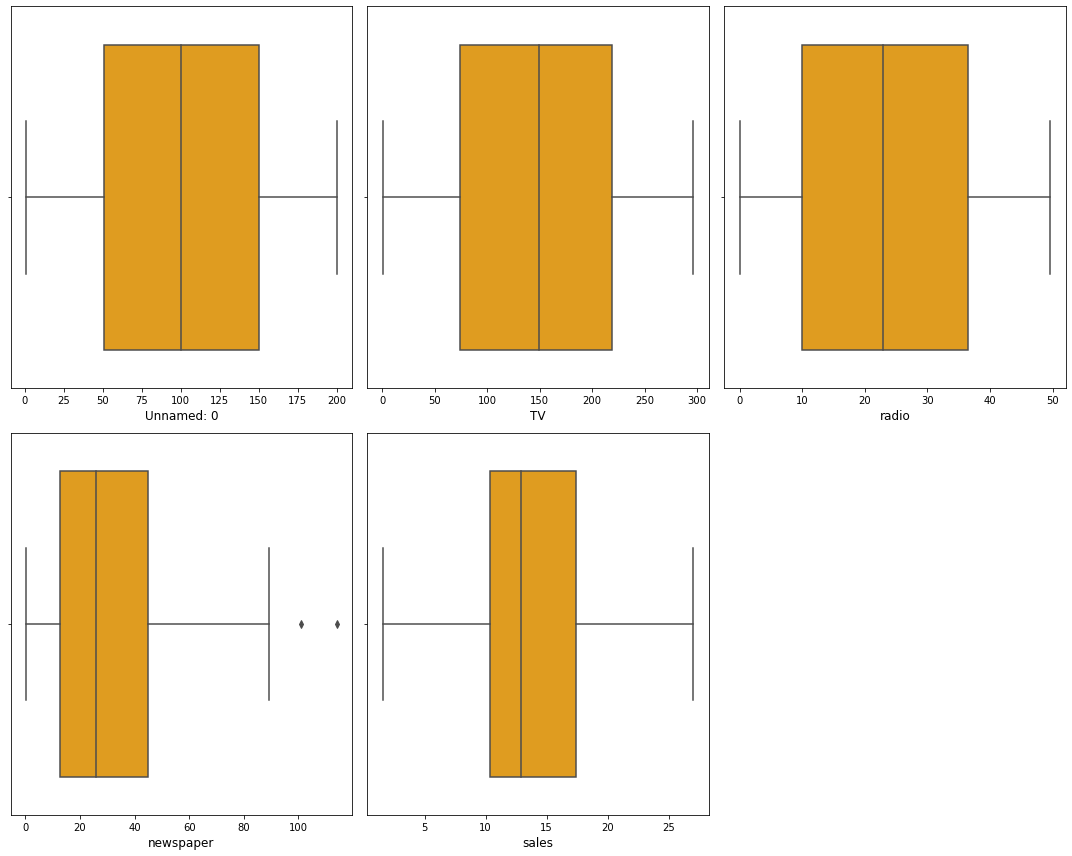

In [26]:
plt.figure(figsize=(15,12),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=5:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color="orange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [27]:
f = df[['newspaper']]
from scipy.stats import zscore
z=np.abs(zscore(f))
z

,newspaper
0,1.778945
1,0.669579
2,1.783549
3,1.286405
4,1.281802
...,...
195,0.771217
196,1.033598
197,1.111852
198,1.640850


In [28]:
df1 = df[(z<3).all(axis=1)] 
df1

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [29]:
df.shape

(200, 5)

In [30]:
df1.shape

(198, 5)

In [31]:
Data_loss=((200-198)/200)*100
Data_loss

1.0

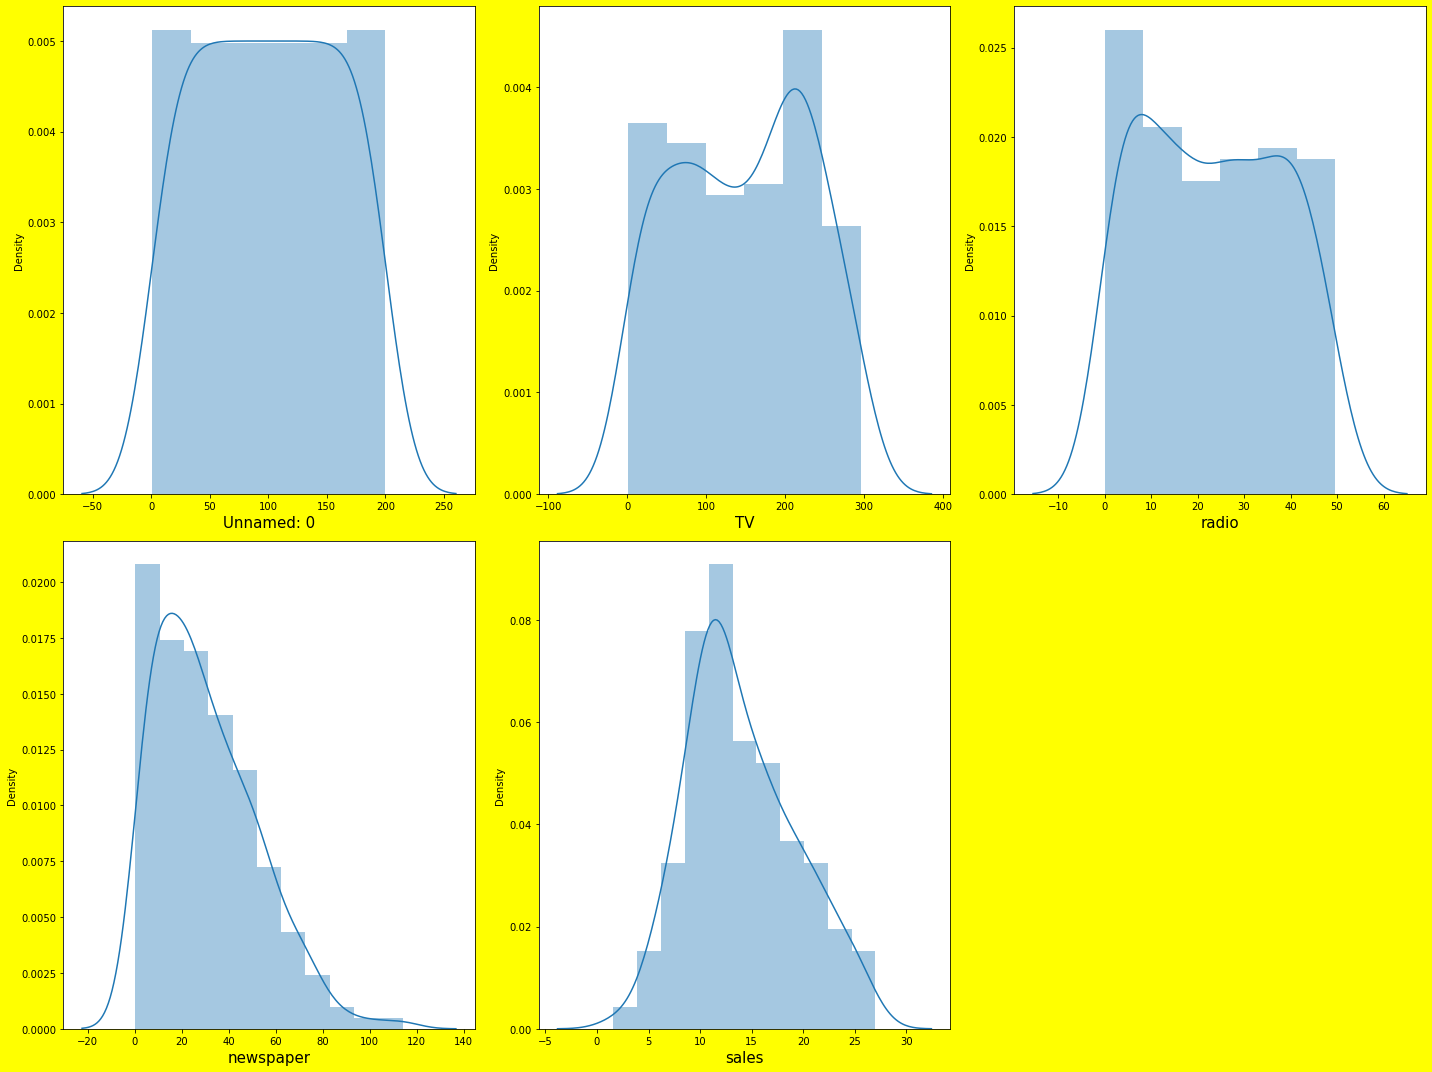

In [32]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber<=5:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
    
    plotnumber+=1
plt.tight_layout()

In [33]:
df1.skew().to_frame("Check skewness present in features")

,Check skewness present in features
Unnamed: 0,-0.006283
TV,-0.082332
radio,0.114842
newspaper,0.650112
sales,0.407130


In [34]:
df1.skew().sort_values(ascending=False).to_frame("Check skewness present in features")

,Check skewness present in features
newspaper,0.650112
sales,0.407130
radio,0.114842
Unnamed: 0,-0.006283
TV,-0.082332


In [35]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df1 [['newspaper']]= scaler.fit_transform(df1[['newspaper']].values)

In [36]:
df1.skew().sort_values(ascending=False).to_frame("Check skewness present in features")

,Check skewness present in features
sales,0.407130
radio,0.114842
Unnamed: 0,-0.006283
TV,-0.082332
newspaper,-0.101288


In [37]:
correlation = df1.corr()
correlation

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.010991,-0.105193,-0.133813,-0.054703
TV,0.010991,1.000000,0.051978,0.038288,0.779121
radio,-0.105193,0.051978,1.000000,0.296570,0.576748
newspaper,-0.133813,0.038288,0.296570,1.000000,0.191387
sales,-0.054703,0.779121,0.576748,0.191387,1.000000


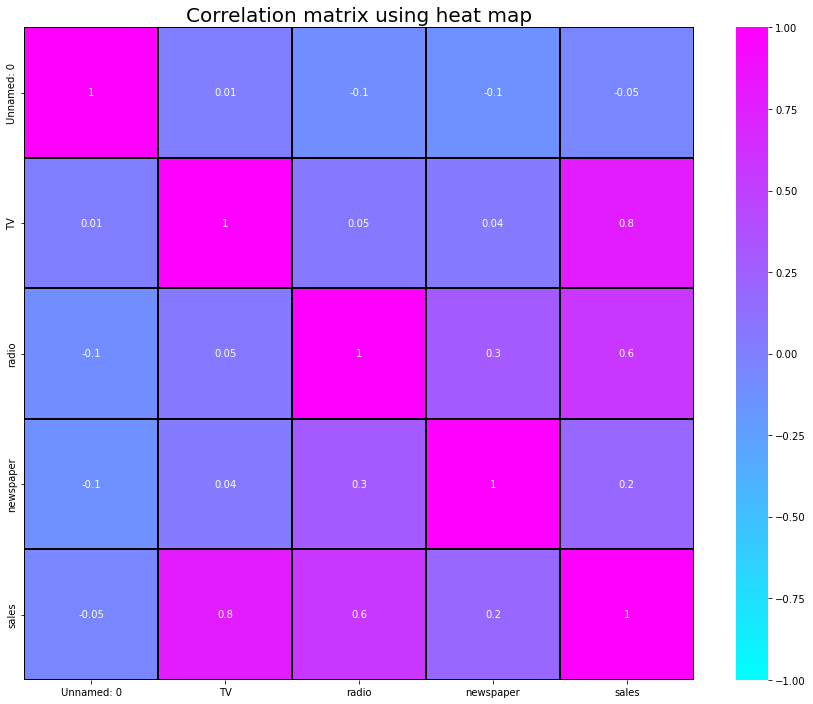

In [38]:
plt.figure(figsize=(15,12))
sns.heatmap(df1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':10},cmap="cool")
plt.title('Correlation matrix using heat map',fontsize=20)
plt.show()

In [39]:
correlation['sales'].sort_values(ascending=False).to_frame("Correlation between label and features")

,Correlation between label and features
sales,1.000000
TV,0.779121
radio,0.576748
newspaper,0.191387
Unnamed: 0,-0.054703


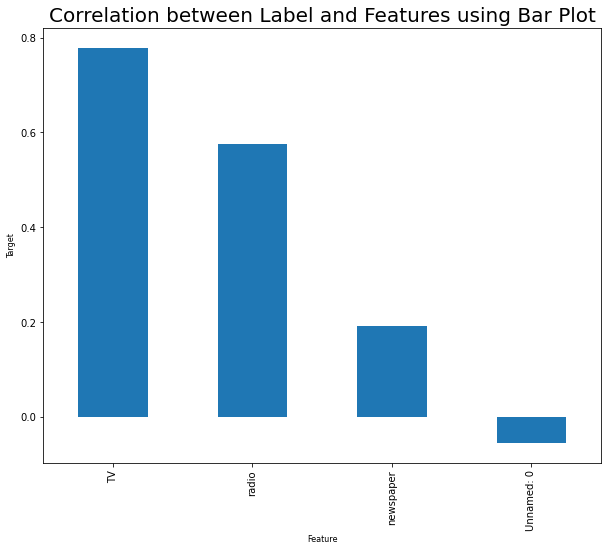

In [40]:
plt.figure(figsize=(10,8))
df1.corr()['sales'].sort_values(ascending=False).drop('sales').plot(kind='bar')
plt.xlabel('Feature',fontsize=8)
plt.ylabel('Target',fontsize=8)
plt.title('Correlation between Label and Features using Bar Plot',fontsize=20)
plt.show()

In [41]:
x = df1.drop('sales', axis=1)
y = df1['sales']

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Unnamed: 0,TV,radio,newspaper
0,-1.731034,0.978697,0.989521,1.604196
1,-1.713709,-1.199012,1.090705,0.831044
2,-1.696383,-1.519332,1.535913,1.607052
3,-1.679058,0.056456,1.225616,1.283768
4,-1.661733,0.400243,-0.831784,1.280622


In [43]:
x

,Unnamed: 0,TV,radio,newspaper
0,-1.731034,0.978697,0.989521,1.604196
1,-1.713709,-1.199012,1.090705,0.831044
2,-1.696383,-1.519332,1.535913,1.607052
3,-1.679058,0.056456,1.225616,1.283768
4,-1.661733,0.400243,-0.831784,1.280622
...,...,...,...,...
193,1.647383,-1.272932,-1.310720,-0.687435
194,1.664708,-0.615864,-1.229773,-1.146090
195,1.682033,0.355657,-0.932968,-1.314437
196,1.699358,1.606431,1.272836,1.517395


In [44]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.023515,Unnamed: 0
1,1.003659,TV
2,1.103832,radio
3,1.110134,newspaper


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [50]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    rfr = RandomForestRegressor()
    rfr.fit(x_train, y_train)
    predrfr = rfr.predict(x_test)
    acc=r2_score(y_test, predrfr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9862042921428036  on Random_state  161


# Maximum Accuracy is 98% at the best random state 161

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [52]:
x_train

,Unnamed: 0,TV,radio,newspaper
155,0.989025,0.036510,-1.472614,-0.060365
176,1.352854,1.525471,-1.405158,-0.091558
44,-0.951399,0.333363,-0.042552,0.284593
138,0.694496,-0.859918,-0.413558,-0.751997
127,0.503919,-1.021838,-0.750837,0.757185
...,...,...,...,...
100,0.036138,1.566538,-0.879003,-0.215389
159,1.058326,-0.715598,0.854610,0.980317
51,-0.830123,0.817951,1.252599,0.623104
139,0.711821,0.551604,0.827628,1.782442


In [53]:
x_test

,Unnamed: 0,TV,radio,newspaper
55,-0.760822,-1.635492,0.335201,0.692862
97,-0.033163,1.678005,1.293072,1.045470
122,0.417293,0.971657,0.618515,1.744211
178,1.387505,0.116296,-1.384921,-1.127528
79,-0.345017,-0.824718,0.240763,-0.166094
9,-1.575107,0.623177,-1.384921,-0.226499
92,-0.119789,1.222751,0.901829,1.691661
98,-0.015838,-0.134797,1.252599,0.860067
39,-1.038025,0.654857,-0.056043,0.289055
196,1.699358,1.606431,1.272836,1.517395


In [54]:
y_train

157    10.1
178    11.8
45     14.9
140    10.9
129     9.7
       ... 
102    14.8
161    13.3
52     22.6
141    19.2
79     11.0
Name: sales, Length: 138, dtype: float64

In [55]:
y_test

56      5.5
98     25.4
124    19.7
180    10.5
80     11.8
9      10.6
93     22.2
99     17.2
40     16.6
198    25.5
152    16.6
135    11.6
171    14.5
41     17.1
57     13.2
118    15.9
143    10.4
117     9.4
116    12.2
196     9.7
199    13.4
120    15.5
26     15.0
144    11.4
7      13.2
109    19.8
90     11.2
69     22.3
190    10.8
167    12.2
103    14.7
63     14.0
126     6.6
168    17.1
83     13.6
74     17.0
27     15.9
197    12.8
73     11.0
49      9.7
151    11.6
147    25.4
42     20.7
28     18.9
121     7.0
113    15.9
76      6.9
182     8.7
131    12.7
29     10.5
163    18.0
155     3.2
46     10.6
172     7.6
58     23.8
123    15.2
176    20.2
107     8.7
72      8.8
59     18.4
Name: sales, dtype: float64

In [56]:
print("x_train shape =",x_train.shape)
print("x_test shape =",x_test.shape)
print("y_train shape =",y_train.shape)
print("y_test shape =",y_test.shape)

x_train shape = (138, 4)
x_test shape = (60, 4)
y_train shape = (138,)
y_test shape = (60,)


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [58]:
lr= LinearRegression()
ridge= Ridge()
lasso= Lasso()
dtr= DecisionTreeRegressor()
svr= SVR()
knr= KNeighborsRegressor()
rfr= RandomForestRegressor()
en= ElasticNet()
sgdr= SGDRegressor()
br=BaggingRegressor()
abr=AdaBoostRegressor()
gbr= GradientBoostingRegressor()

In [59]:
model=[lr,ridge,lasso,dtr,svr,knr,rfr,en,sgdr,br,abr,gbr]

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
for i in model:
    p=i
    p.fit(x_train,y_train)
    print("accuracy score of",i,"is =",p.score(x_train,y_train))
    scr=cross_val_score(i,x,y,cv=4)
    print("cross validation score of",i,"is =",scr.mean())
    print("\n")
    print("______"*10)

accuracy score of LinearRegression() is = 0.8851877812327444
cross validation score of LinearRegression() is = 0.8834534266738404


____________________________________________________________
accuracy score of Ridge() is = 0.8851434997038378
cross validation score of Ridge() is = 0.883528592065683


____________________________________________________________
accuracy score of Lasso() is = 0.8152056927382981
cross validation score of Lasso() is = 0.8152800487338876


____________________________________________________________
accuracy score of DecisionTreeRegressor() is = 1.0
cross validation score of DecisionTreeRegressor() is = 0.9360615999951328


____________________________________________________________
accuracy score of SVR() is = 0.8708736378523914
cross validation score of SVR() is = 0.78691010458808


____________________________________________________________
accuracy score of KNeighborsRegressor() is = 0.9233690719829298
cross validation score of KNeighborsRegressor() i

In [67]:
from sklearn.model_selection import GridSearchCV
param={'alpha':[1.0,.05,.4,2],
    'fit_intercept':['True','False'],
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga', 'lbfgs'],
    'positive':['False','True'],
    'random_state':[1,4,10,20]}
gscv1=GridSearchCV(Ridge(),param,cv=5)
gscv1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': ['True', 'False'],
                         'positive': ['False', 'True'],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [68]:
gscv1.best_params_

{'alpha': 0.05,
 'fit_intercept': 'True',
 'positive': 'False',
 'random_state': 1,
 'solver': 'auto'}

In [69]:
gscv1.best_estimator_

Ridge(alpha=0.05, fit_intercept='True', positive='False', random_state=1)

In [73]:
gscvpred1=gscv1.best_estimator_.predict(x_test)
gscv1.best_estimator_.score(x_train,y_train)

0.8848155848935522

In [74]:
final_model=GradientBoostingRegressor(max_depth=4)

In [75]:
final_model.fit(x_test,y_test)
pred=final_model.predict(x_test)
final_model.fit(x_train,y_train)
pred1=final_model.predict(x_train)

In [76]:
print("Test Accuracy=",final_model.score(x_test,y_test))
print("Train Accuracy=",final_model.score(x_train,y_train))

Test Accuracy= 0.982683086161108
Train Accuracy= 0.9999275680432398


In [77]:
import joblib
joblib.dump(final_model,"Advertising Sales Channel Prediction.pkl")

['Advertising Sales Channel Prediction.pkl']

In [78]:
model=joblib.load("Advertising Sales Channel Prediction.pkl")

In [79]:
prediction = model.predict(x_test)
a = np.array(y_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,5.5,5.885225
1,25.4,24.693146
2,19.7,20.310398
3,10.5,11.141945
4,11.8,11.910738
5,10.6,11.409173
6,22.2,20.956597
7,17.2,18.407772
8,16.6,16.141068
9,25.5,25.301948


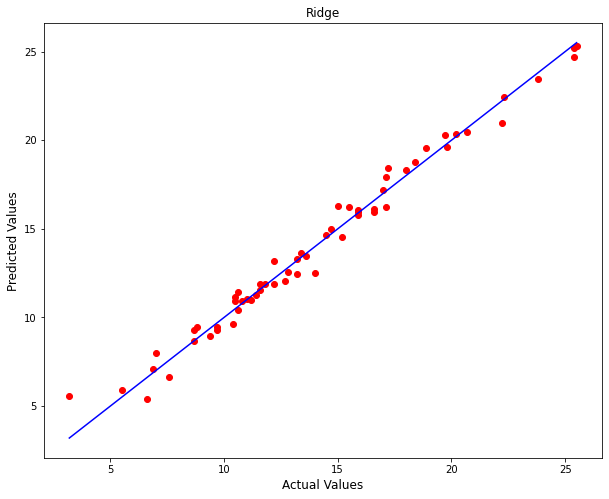

In [80]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, prediction, c='r')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Ridge')
plt.show()